## Data Set: OWID COVID Data
### Please check their repository
### https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('owid-covid-data.csv')
df.tail()

C:\Users\cheng\AppData\Local\Temp\ipykernel_25368\723140215.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
376914,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376915,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376916,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376917,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376918,ZWE,Africa,Zimbabwe,2024-02-04,266265.0,0.0,0.000,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [2]:
# DtypeWarning: Columns (33) have mixed types. Check the column 33.
df.iloc[:,33].unique()

array([nan, 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

#### There might have both numeric and non-numeric data in that column.
#### we can correct this by: df = pd.read_csv('owid-covid-data.csv', dtype={33: str})

In [3]:
df.shape

(376919, 67)

In [4]:
df_US = df[df['location']=='United States']
df_US.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
356287,USA,North America,United States,2024-02-04,103436829.0,NaN,NaN,1170784.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356288,USA,North America,United States,2024-02-05,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356289,USA,North America,United States,2024-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356290,USA,North America,United States,2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356291,USA,North America,United States,2024-02-08,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


C:\Users\cheng\AppData\Local\Temp\ipykernel_25368\1276717324.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['date'] = pd.to_datetime(df_US['date'])


ConversionError: Failed to convert value(s) to axis units: 354796   2020-01-05
354797   2020-01-06
354798   2020-01-07
354799   2020-01-08
354800   2020-01-09
            ...    
356287   2024-02-04
356288   2024-02-05
356289   2024-02-06
356290   2024-02-07
356291   2024-02-08
Name: date, Length: 1496, dtype: datetime64[ns]

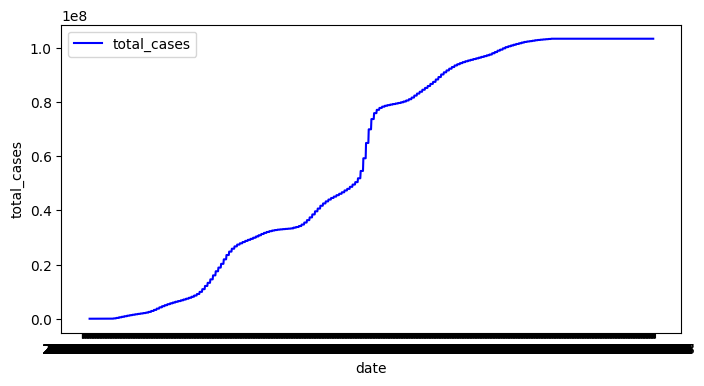

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data
sns.lineplot(data=df_US, x='date', y='total_cases', label='total_cases', color='blue')

# Date processing
if not pd.api.types.is_datetime64_any_dtype(df_US['date']):
    try:
        # Convert 'date' column to datetime
        df_US['date'] = pd.to_datetime(df_US['date'])
    except ValueError:
        print("Error: Unable to convert 'date' column to datetime")
